In [4]:
import os
os.chdir("/home/donghan/Downloads") #Change to your own directory

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
dataset = pd.read_csv("binarizedC.csv")
dataset.index = list(range(1,434))
df = dataset.T
df = pd.DataFrame(df, columns = list(range(1, len(dataset.index)-1)))

#Checking missing values
df.isnull().values.any()

False

In [ ]:
#No need to split data because we do not need build models here

In [33]:
#Freq tables
freq = apriori(df, min_support=0.001, use_colnames=True, max_len=None, n_jobs=1)
freq

,support,itemsets
0,0.010602,(1)
1,0.002170,(2)
2,0.003038,(3)
3,0.003100,(4)
4,0.001240,(5)
5,0.003348,(6)
6,0.005518,(7)
7,0.003720,(8)
8,0.002790,(9)
9,0.003410,(10)


In [26]:
#Histograms plot
from itertools import chain
lst = (dataset.values.tolist())
p = list(chain(*lst))

Text(0.5, 1.0, 'Frequency of 1 and 0 (Spiking or Not)')

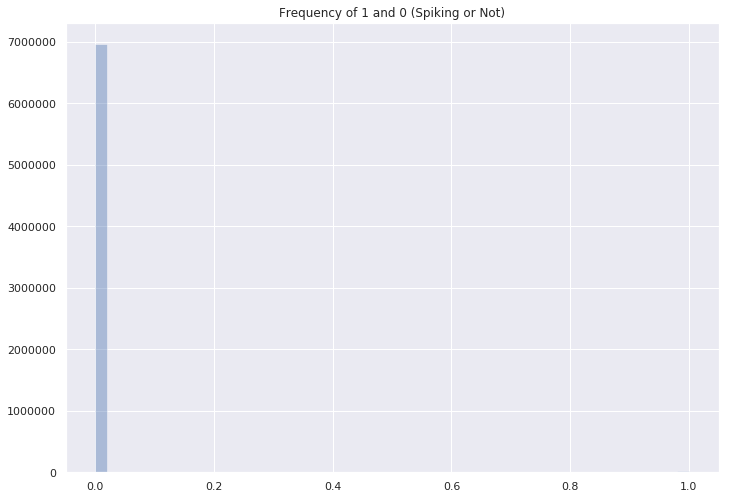

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.distplot(p,kde=False).set_title('Frequency of 1 and 0 (Spiking or Not)')

In [28]:
import collections
counter=collections.Counter(p)
print(counter)

Counter({0: 6963243, 1: 20614})


In [29]:
#Sparse data
train_df = dataset
idx = train_df.columns.values[0:]
stat = pd.DataFrame()

stat['sum'] = train_df[idx].sum(axis=1)  
stat['min'] = train_df[idx].min(axis=1)
stat['max'] = train_df[idx].max(axis=1)
stat['mean'] = train_df[idx].mean(axis=1)
stat['std'] = train_df[idx].std(axis=1)

In [30]:
stat.sort_values("max", ascending=[0])

,sum,min,max,mean,std
1,171,0,1,0.010602,0.102422
286,58,0,1,0.003596,0.059861
297,57,0,1,0.003534,0.059344
296,50,0,1,0.003100,0.055593
295,43,0,1,0.002666,0.051566
294,83,0,1,0.005146,0.071553
293,75,0,1,0.004650,0.068034
292,79,0,1,0.004898,0.069816
291,72,0,1,0.004464,0.066666
290,81,0,1,0.005022,0.070690


In [34]:
from mlxtend.frequent_patterns import association_rules
assoc = association_rules(freq, metric='confidence', min_threshold=0.00001, support_only=False)
assoc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2),(4),0.002170,0.003100,0.001364,0.628571,202.764571,0.001357,2.683962
1,(4),(2),0.003100,0.002170,0.001364,0.440000,202.764571,0.001357,1.781839
2,(29),(5),0.003658,0.001240,0.001240,0.338983,273.372881,0.001235,1.510945
3,(5),(29),0.001240,0.003658,0.001240,1.000000,273.372881,0.001235,inf
4,(12),(119),0.005704,0.006138,0.001612,0.282609,46.042380,0.001577,1.385383
5,(119),(12),0.006138,0.005704,0.001612,0.262626,46.042380,0.001577,1.348429
6,(13),(14),0.004650,0.015066,0.001116,0.240000,15.929877,0.001046,1.295966
7,(14),(13),0.015066,0.004650,0.001116,0.074074,15.929877,0.001046,1.074978
8,(13),(198),0.004650,0.007192,0.001054,0.226667,31.516437,0.001021,1.283803
9,(198),(13),0.007192,0.004650,0.001054,0.146552,31.516437,0.001021,1.166269


In [35]:
assoc.sort_values("confidence", ascending=[0])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
360,"(59, 22)",(56),0.001178,0.003968,0.001178,1.000000,252.015625,0.001173,inf
3,(5),(29),0.001240,0.003658,0.001240,1.000000,273.372881,0.001235,inf
388,"(307, 300)",(63),0.001178,0.004526,0.001178,1.000000,220.945205,0.001173,inf
383,"(62, 46)",(65),0.001240,0.008060,0.001240,1.000000,124.069231,0.001230,inf
378,"(41, 59)",(56),0.001054,0.003968,0.001054,1.000000,252.015625,0.001050,inf
359,"(56, 22)",(59),0.001178,0.004464,0.001178,1.000000,224.013889,0.001173,inf
364,"(56, 26)",(59),0.001364,0.004464,0.001364,1.000000,224.013889,0.001358,inf
366,"(26, 59)",(56),0.001426,0.003968,0.001364,0.956522,241.058424,0.001358,22.908736
310,(277),(181),0.001302,0.002480,0.001240,0.952381,384.023810,0.001237,20.947920
376,"(56, 41)",(59),0.001116,0.004464,0.001054,0.944444,211.568673,0.001049,17.919648


In [ ]:
raw = df[255].values.tolist()
x = []
y = []
for i in range(len(raw)):
    if raw[i] == 1:
        x.append(i)
    else:
        y.append(i)
x

In [ ]:
raw = df[426].values.tolist()
x1 = []
y = []
for i in range(len(raw)):
    if raw[i] == 1:
        x1.append(i)
    else:
        y.append(i)
(x1)

In [ ]:
p = []
for i in x:
    for j in x1:
        if i == j:
            p.append(i)
len(p)/len(x)

In [ ]:
raw = df[13].values.tolist()
x1 = []
y = []
for i in range(len(raw)):
    if raw[i] == 1:
        x1.append(i)
    else:
        y.append(i)
len(x1)